In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import sys
import zipfile
!{sys.executable} -m pip install kaggle  --quiet
import kaggle

In [2]:
import kaggle
kaggle.api.competition_download_files('rossmann-store-sales',path='.')
zipfile.ZipFile("rossmann-store-sales.zip").extractall(".")
print(os.listdir("."))

['.ipynb_checkpoints', 'rossmann-store-sales.zip', 'sample_submission.csv', 'store.csv', 'test.csv', 'train.csv', 'Untitled.ipynb']


In [3]:
ross_df = pd.read_csv('./train.csv', low_memory=False)

In [4]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
ross_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [6]:
ross_df.SchoolHoliday.value_counts()

SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64

In [7]:
store_df = pd.read_csv('./store.csv')

In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
store_df.StoreType.value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

In [10]:
store_df.Assortment.value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

In [11]:
store_df.PromoInterval.isnull().sum()

np.int64(544)

In [12]:
store_df.Promo2.value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

In [13]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df.shape

(1017209, 18)

In [14]:
test_df = pd.read_csv('./test.csv')
merged_test_df = test_df.merge(store_df, how='left', on='Store') 

In [15]:
merged_test_df.shape

(41088, 17)

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [17]:
merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [18]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [19]:
merged_df.duplicated().sum()

np.int64(0)

In [20]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [21]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [22]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [23]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

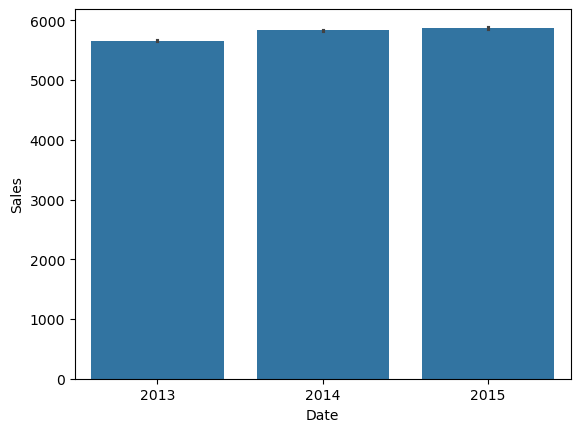

In [24]:
sns.barplot(data=merged_df, x=merged_df.Date.dt.year, y="Sales")
plt.show()

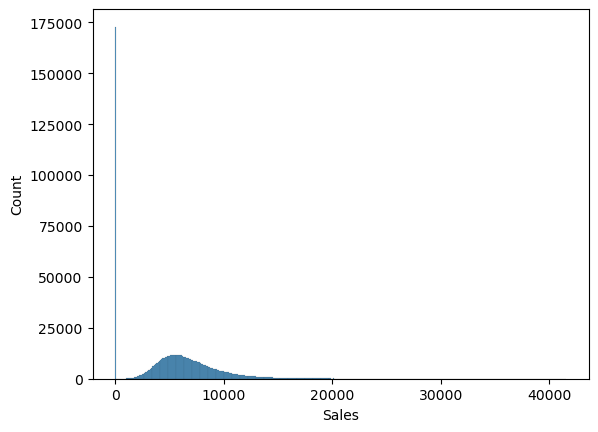

In [25]:
sns.histplot(data=merged_df, x='Sales')
plt.show()

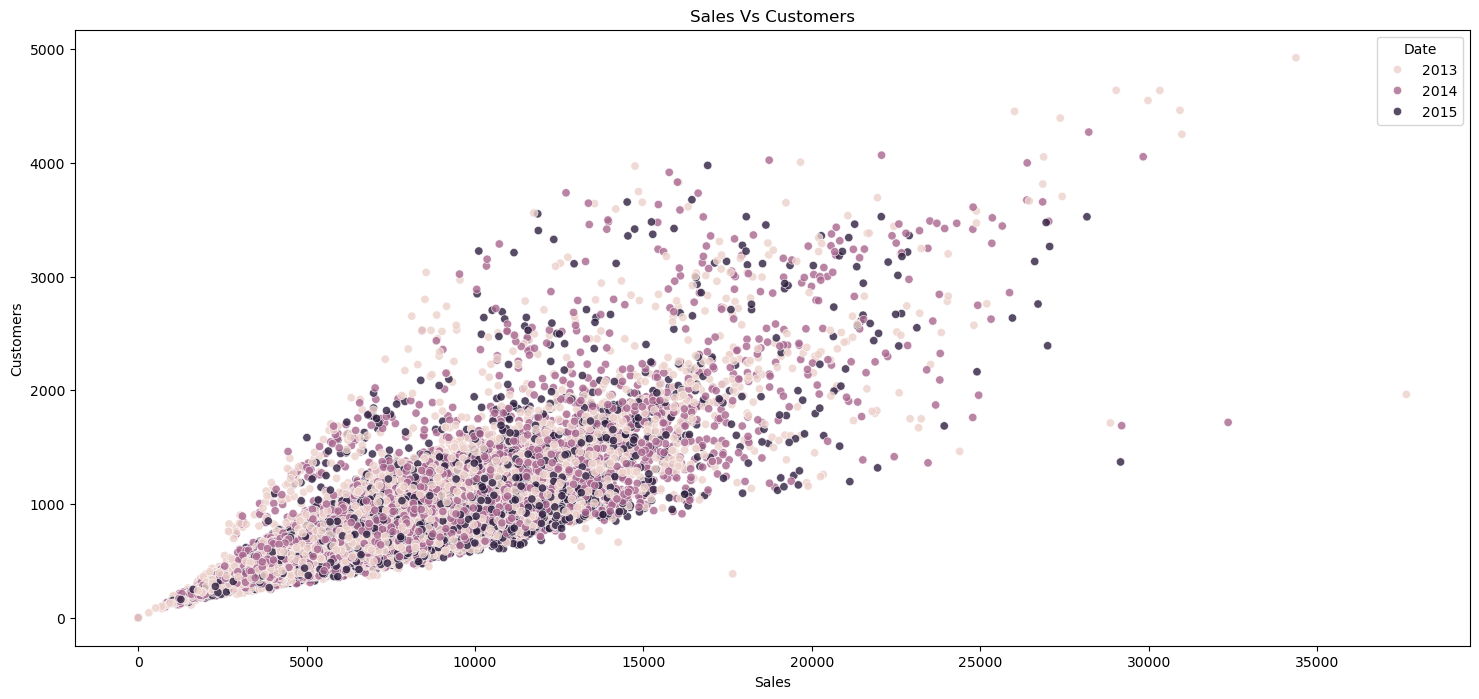

In [26]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

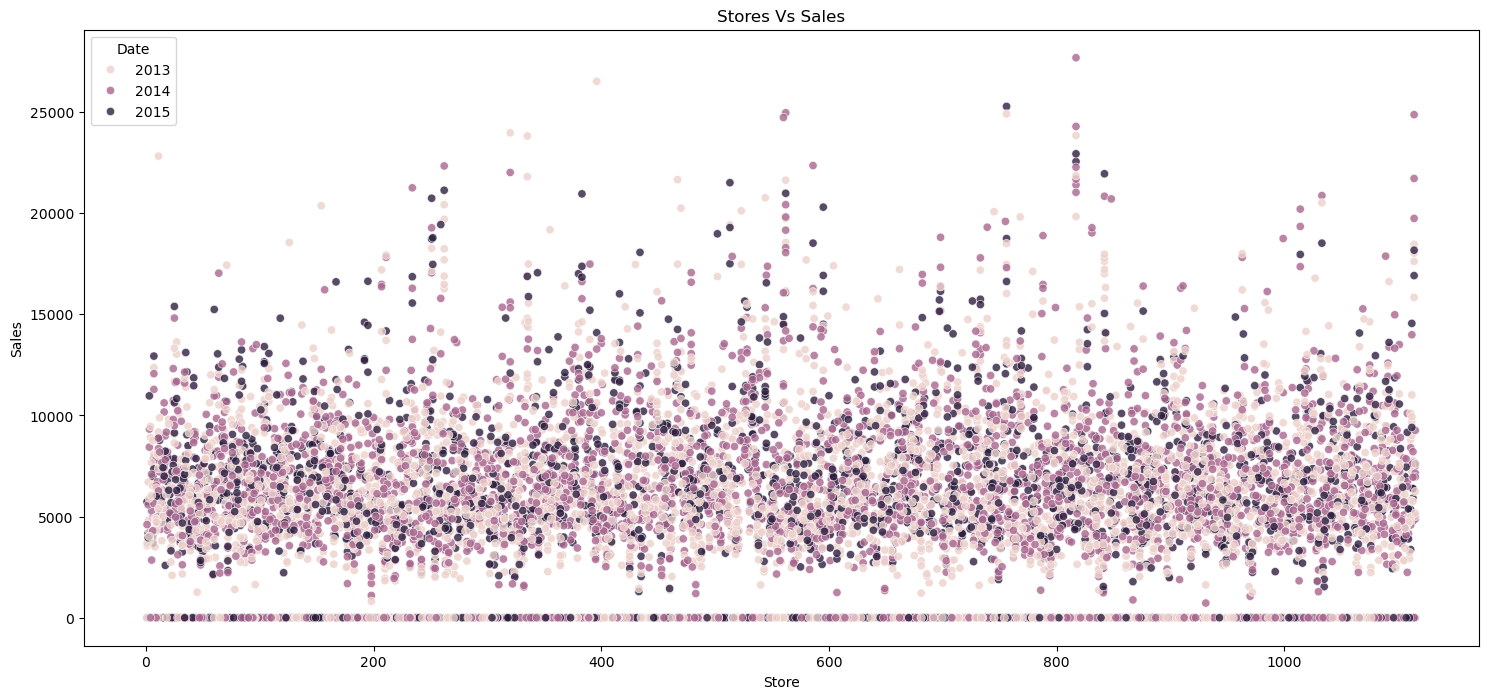

In [27]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

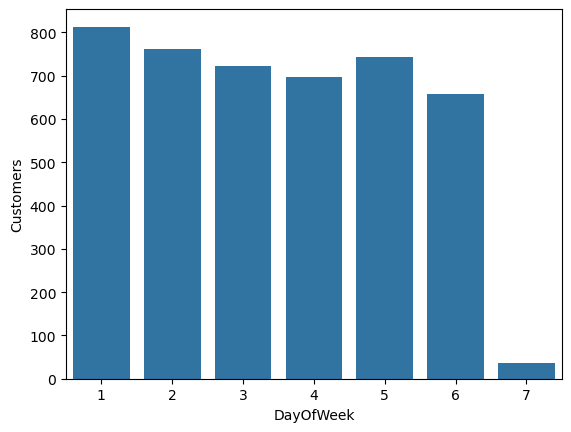

In [28]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Customers',errorbar=None)
plt.show()

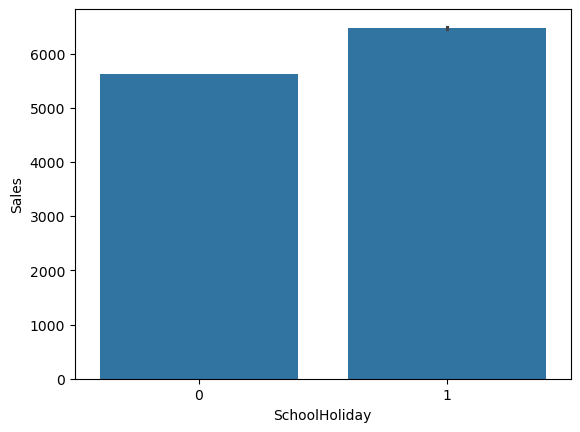

In [29]:
sns.barplot(data=merged_df, x='SchoolHoliday', y='Sales')
plt.show()

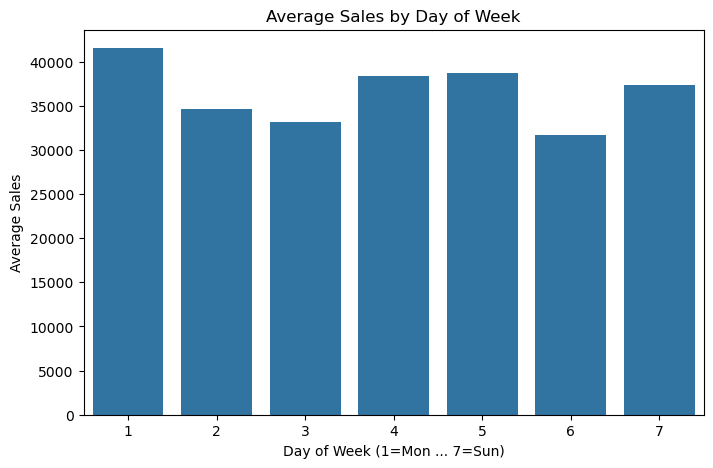

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged_df, x="DayOfWeek", y="Sales",estimator=np.max,errorbar=None)

plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (1=Mon ... 7=Sun)")
plt.ylabel("Average Sales")
plt.show()

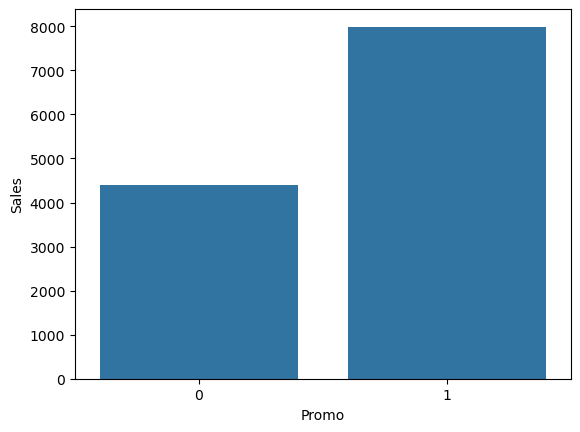

In [31]:
sns.barplot(data=merged_df, x='Promo', y='Sales',errorbar=None,estimator=np.mean)
plt.show()

In [32]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [33]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

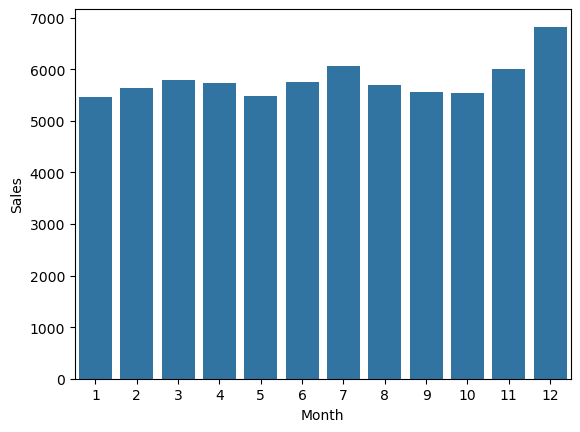

In [34]:
sns.barplot(data=merged_df, x='Month', y='Sales',errorbar=None)
plt.show()

In [35]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [36]:
len(merged_df)

1017209

In [37]:
cutter=int(0.75*len(merged_df))
cutter

762906

In [38]:
sorted_df=merged_df.sort_values('Date')
train_df,val_df=sorted_df[:cutter],sorted_df[cutter:]
len(train_df),len(val_df)

(762906, 254303)

In [39]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-12 00:00:00'))

In [40]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-12 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [41]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [42]:
input_cols=['Store', 'DayOfWeek','Open','Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment','Day', 'Month', 'Year']
target_cols=['Sales']

In [43]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [44]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [45]:
test_inputs = merged_test_df[input_cols].copy()

In [46]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762906 entries, 1017208 to 254623
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          762906 non-null  int64 
 1   DayOfWeek      762906 non-null  int64 
 2   Open           762906 non-null  int64 
 3   Promo          762906 non-null  int64 
 4   StateHoliday   762906 non-null  object
 5   SchoolHoliday  762906 non-null  int64 
 6   StoreType      762906 non-null  object
 7   Assortment     762906 non-null  object
 8   Day            762906 non-null  int32 
 9   Month          762906 non-null  int32 
 10  Year           762906 non-null  int32 
dtypes: int32(3), int64(5), object(3)
memory usage: 61.1+ MB


In [47]:
numeric_cols = ['Store', 'Day','Year','Promo','Open', 'SchoolHoliday']
cat_cols = ['DayOfWeek', 'Month', 'StateHoliday', 'StoreType', 'Assortment']

In [48]:
train_inputs[numeric_cols].isnull().sum()

Store            0
Day              0
Year             0
Promo            0
Open             0
SchoolHoliday    0
dtype: int64

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(train_inputs[numeric_cols])

In [50]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [52]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[cat_cols])
encoded_cols=encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [53]:
train_inputs.loc[:,encoded_cols] = encoder.transform(train_inputs[cat_cols])
val_inputs.loc[:,encoded_cols] = encoder.transform(val_inputs[cat_cols])
test_inputs.loc[:,encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [54]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

*Dumb Model*

In [55]:
len(X_train)

762906

In [56]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [57]:
prediction=return_mean(X_train)
prediction

array([5773.81897231, 5773.81897231, 5773.81897231, ..., 5773.81897231,
       5773.81897231, 5773.81897231])

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
np.sqrt(mean_squared_error(prediction,train_targets))

np.float64(3806.4287422638695)

In [60]:
prediction=return_mean(X_val)

In [61]:
print("Dumb model error on Validation ",np.sqrt(mean_squared_error(prediction,val_targets)))

Dumb model error on Validation  3977.5576294933835


*Base Model*

In [62]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, train_targets)

In [63]:
train_preds = linreg.predict(X_train)
train_preds
print(np.sqrt(mean_squared_error(train_preds, train_targets)))

2490.638809429477


In [64]:
val_preds = linreg.predict(X_val)
val_preds
print("Linear Regression(Base) model error on Validation ",np.sqrt(mean_squared_error(val_preds, val_targets)))

Linear Regression(Base) model error on Validation  2540.0995957936843


*Model Training and Evaluation*

In [65]:
def try_model(model):
    model.fit(X_train, train_targets)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    train_rmse = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse, val_rmse

*Linear Models*

In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

*Linear Regression*

In [67]:
try_model(LinearRegression())

(np.float64(2490.638809429477), np.float64(2540.0995957936843))

*Lasso Regression*

In [72]:
try_model(Lasso())

(np.float64(2490.986990380008), np.float64(2541.517019654507))

*Ridge Regression*

In [73]:
try_model(Ridge())

(np.float64(2490.6388138451966), np.float64(2540.099817552327))

*ElasticNet*

In [74]:
try_model(ElasticNet())

(np.float64(3108.979704650981), np.float64(3260.653920317679))

*SGD Regressor*

In [75]:
try_model(SGDRegressor())

C:\Users\sazzt\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(np.float64(2490.861648842906), np.float64(2540.226121776512))

*Tree Based Models*

In [76]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [77]:
tree=DecisionTreeRegressor(random_state=42)
try_model(tree)

(np.float64(0.0), np.float64(1490.2063411667418))

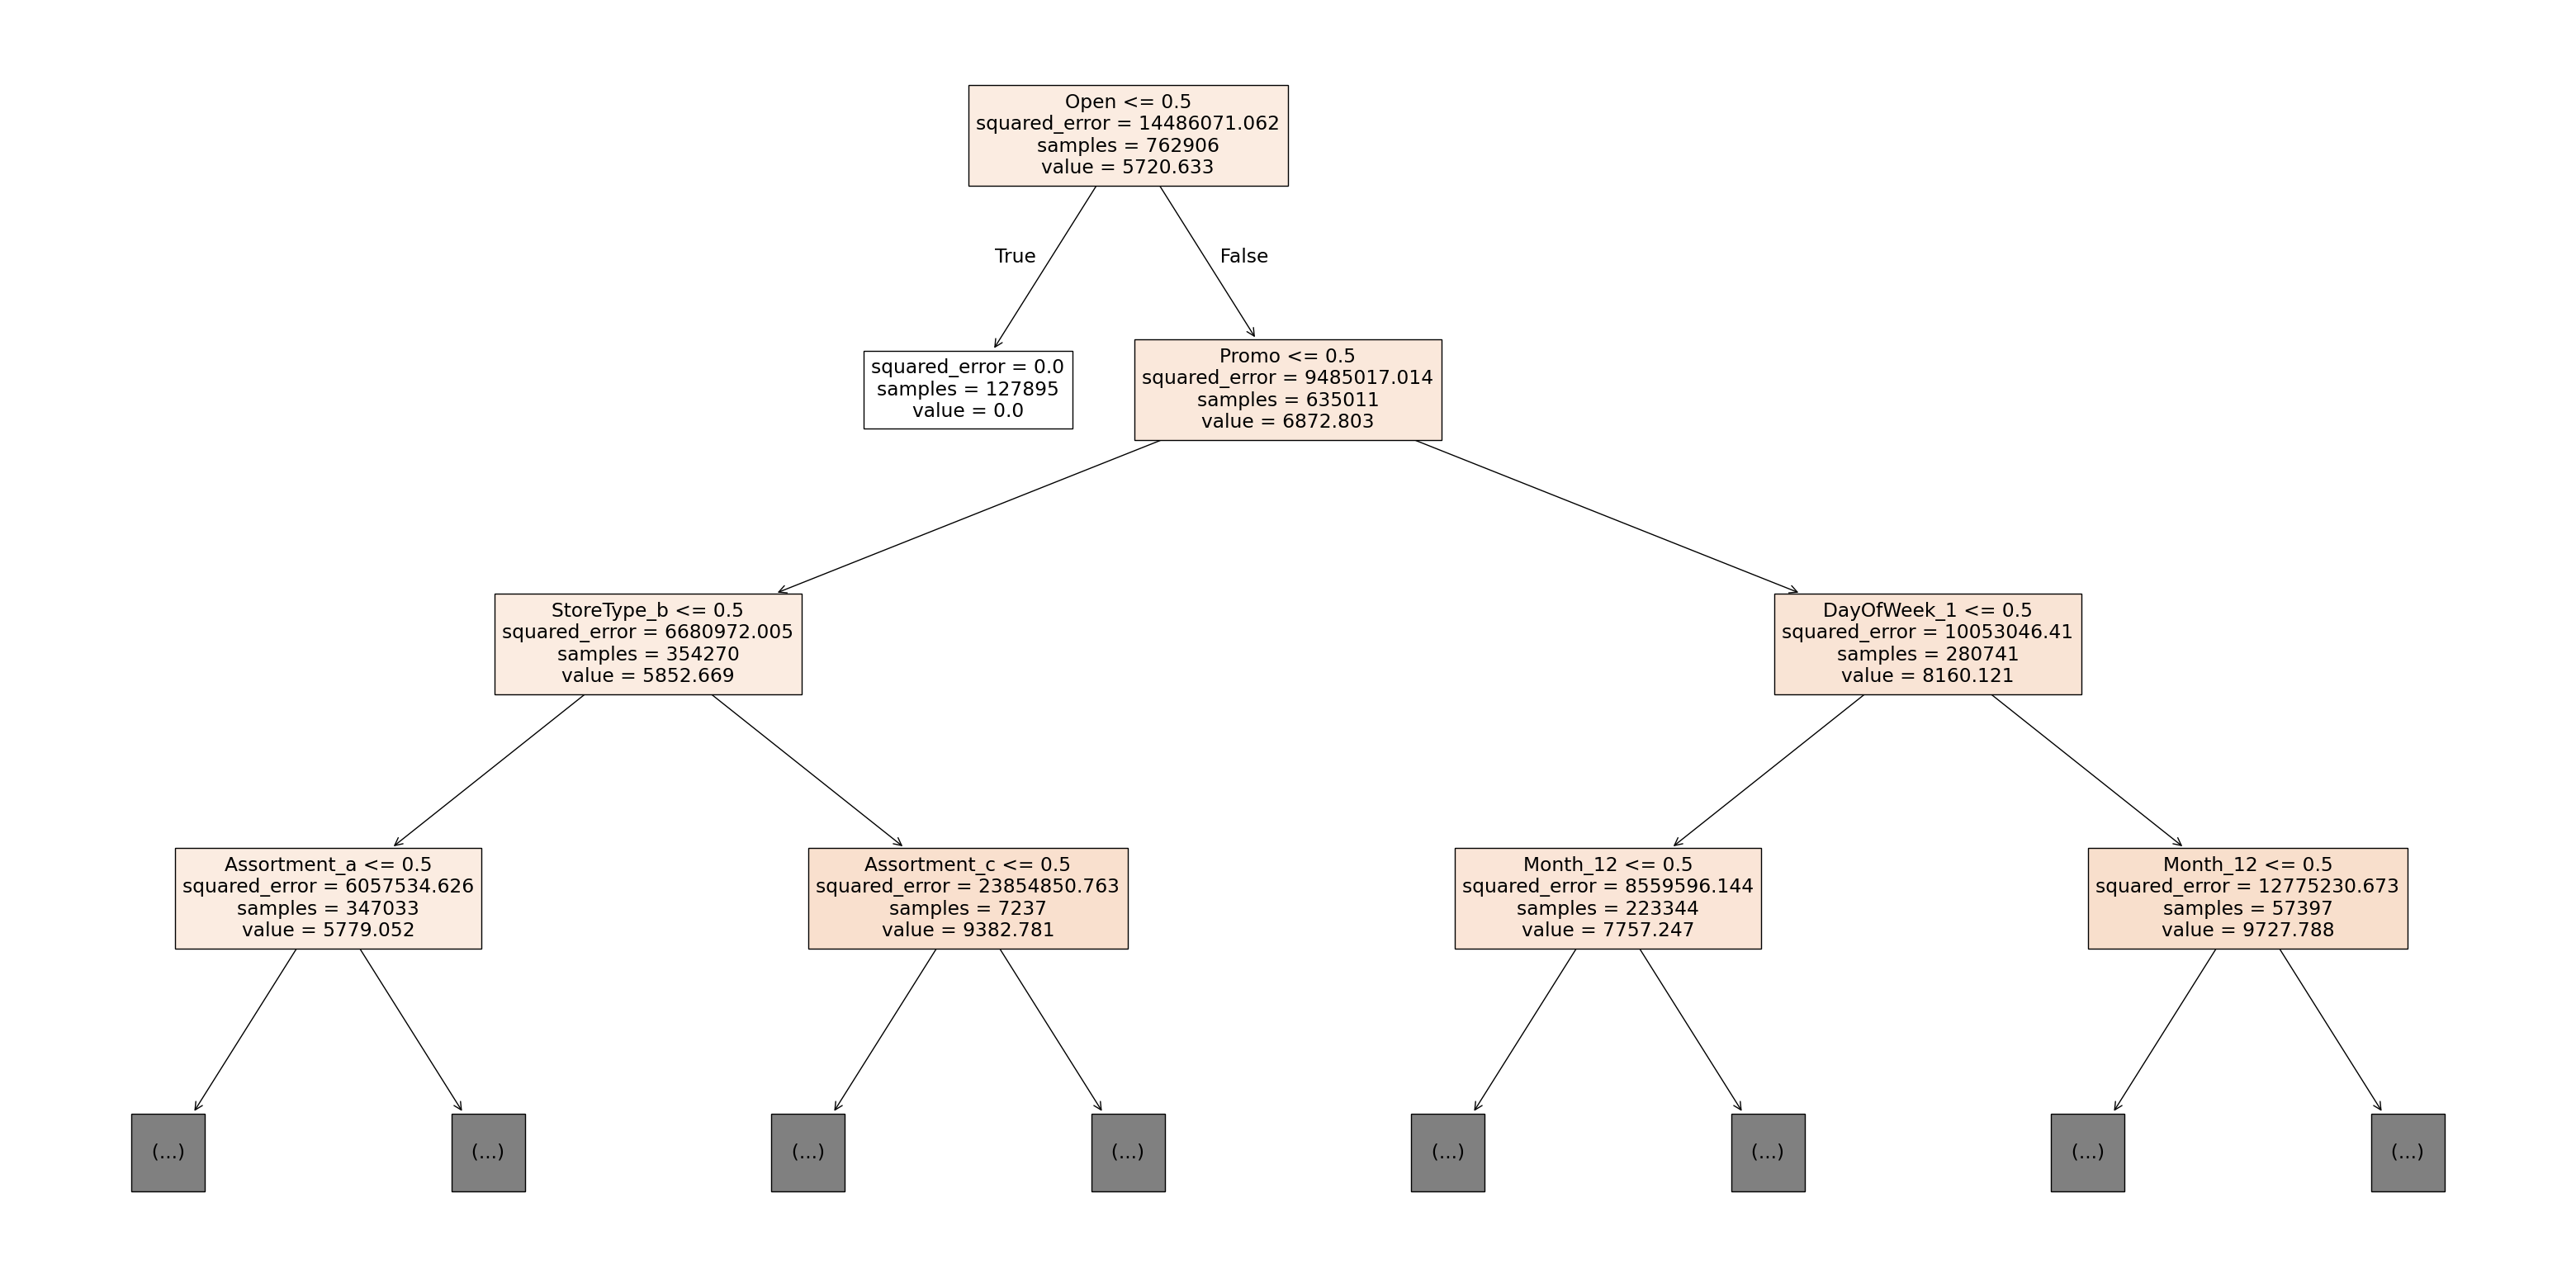

In [78]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);
plt.show()

*Random Forest*

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

C:\Users\sazzt\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(np.float64(433.7517259839237), np.float64(1246.9560623540278))

*Regularization*

In [81]:
param_dist = {
    "n_estimators": [100],
    "max_depth": [15, 25],
    "min_samples_split": [10, 20],
    "min_samples_leaf": [5,10],
    "max_features": [0.5, "sqrt"]
}

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=1)
search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,n_iter=5,cv=2,scoring="neg_root_mean_squared_error",random_state=42,
                            n_jobs=1)
X_sample = X_train.sample(50000, random_state=42)
y_sample = train_targets.loc[X_sample.index]
search.fit(X_sample, y_sample.values.ravel())

print("Best Parameters:", search.best_params_)
print("Best CV RMSE:", -search.best_score_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 0.5, 'max_depth': 15}
Best CV RMSE: 2301.7024576051836


In [83]:
best_rf = search.best_estimator_

In [84]:
predict=best_rf.predict(X_train)

In [85]:
np.sqrt(mean_squared_error(train_targets,predict))

np.float64(2242.664108382753)

In [86]:
predict=best_rf.predict(X_val)

In [89]:
print(np.sqrt(mean_squared_error(val_targets,predict)))

2354.5609193811756


*Random Forest model has the least error on Validation data*

In [90]:
X_df=pd.concat([X_train,X_val], axis=0)
y_df=pd.concat([train_targets,val_targets],axis=0)
rf = RandomForestRegressor(random_state=42, n_jobs=-1).fit(X_df,y_df.values.ravel())

In [91]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
4,Open,0.460137
0,Store,0.323222
3,Promo,0.073149
1,Day,0.025426
6,DayOfWeek_1,0.017970
30,StoreType_b,0.012911
24,Month_12,0.011664
2,Year,0.007785
29,StoreType_a,0.007714
32,StoreType_d,0.007281


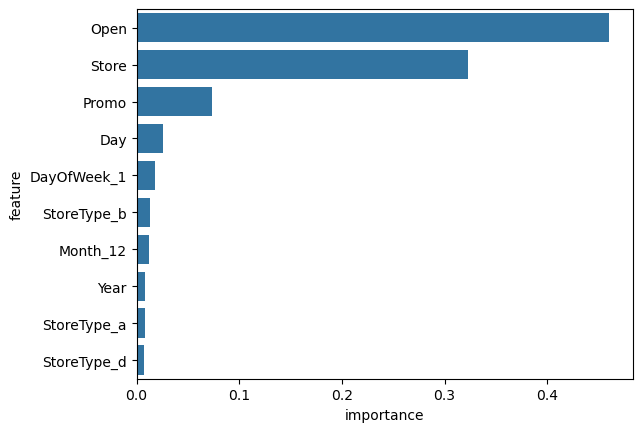

In [92]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature')
plt.show()

*Individual Predictions*

In [99]:
def predict_input(model, single_input):
    
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df.loc[:,encoded_cols] = encoder.transform(input_df[cat_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [100]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

In [101]:
predict_input(rf, sample_input)

np.float64(4338.34)

*Kaggle Submission*

In [102]:
test_preds = rf.predict(X_test)
test_preds

array([ 4338.34,  7594.13,  8834.07, ...,  5844.27, 24912.34,  7702.76])

In [103]:
submission_df = pd.read_csv('./sample_submission.csv')

In [104]:
submission_df['Sales'] = test_preds.astype('float')

In [105]:
submission_df.to_csv('submission.csv', index=None)

In [107]:
from IPython.display import FileLink

In [108]:
FileLink('submission.csv')

C:\Users\sazzt\Desktop\Jupyter_Notebook\Rossmann Store Sales_Prediction\submission.csv

Kaggle score on the test dataset is 0.13
Leaderboard rank : top 2100